# Problem Statement 

**The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.**

Dataset link: https://www.kaggle.com/uciml/pima-indians-diabetes-database

**Let's start importing with necessary libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Reading the dataset
Diabetes_data = pd.read_csv('diabetes.csv')
Diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
Diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# checking for nulll values
Diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It seems that there are no missing values in our data. Great, now we look for the distribution of data:

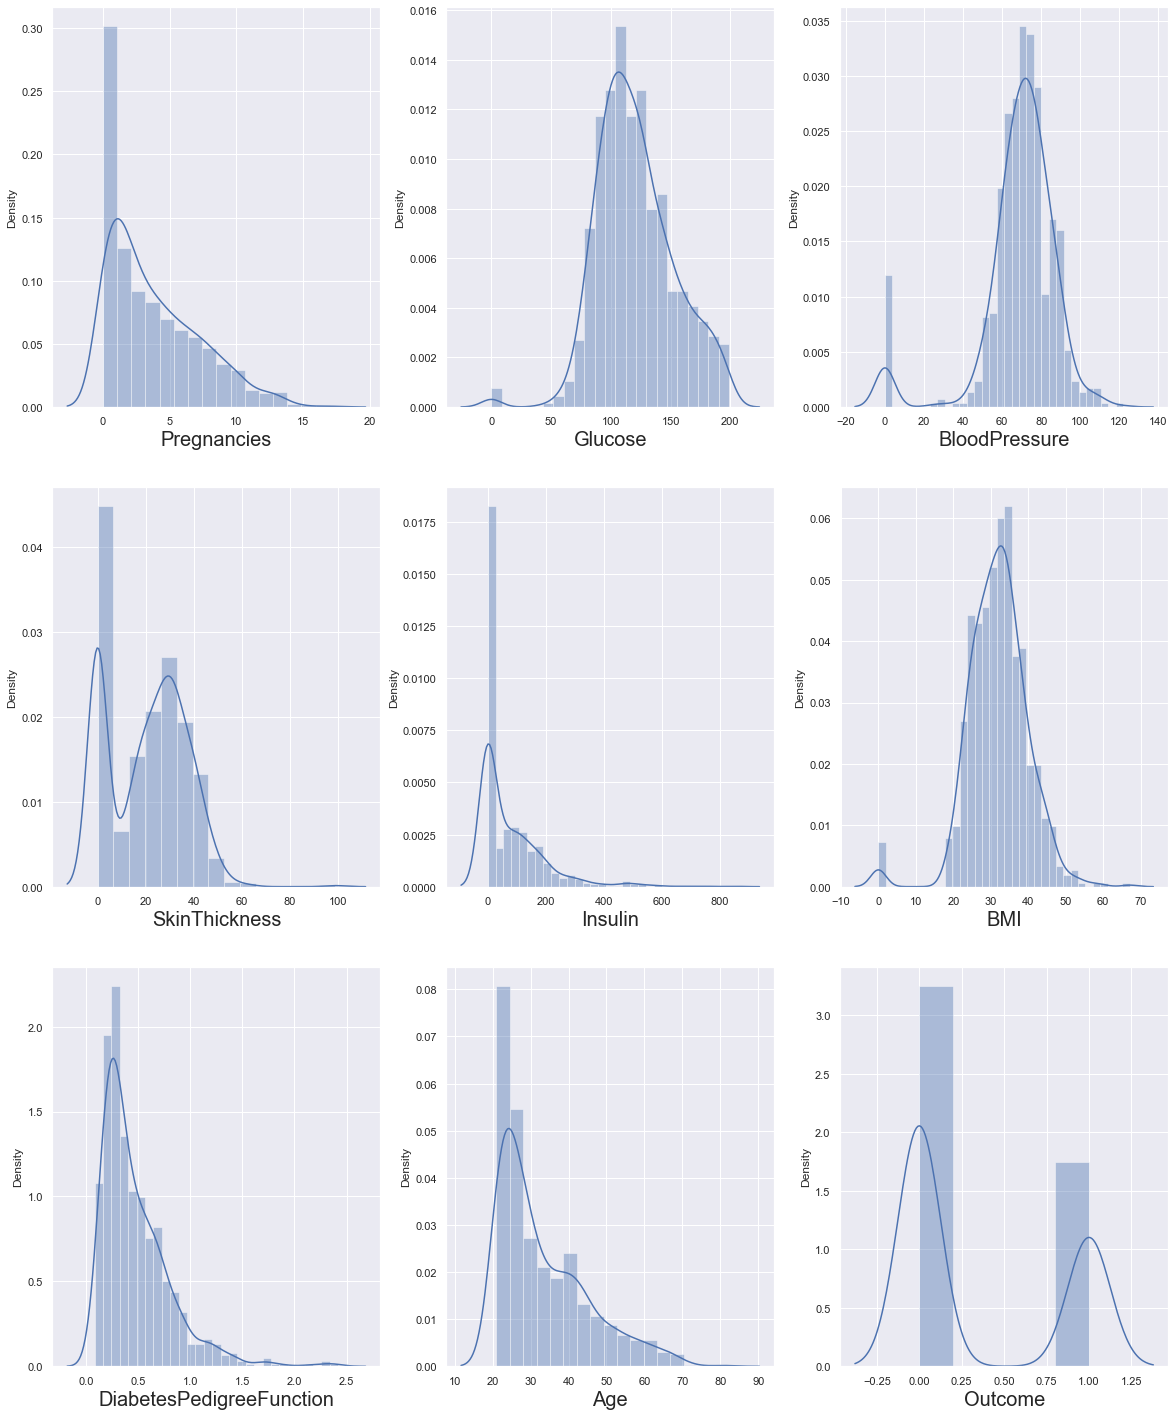

In [5]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Diabetes_data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.

In [6]:
# replacing zero values with the mean of the column
Diabetes_data['BMI'] = Diabetes_data['BMI'].replace(0,Diabetes_data['BMI'].mean())
Diabetes_data['BloodPressure'] = Diabetes_data['BloodPressure'].replace(0,Diabetes_data['BloodPressure'].mean())
Diabetes_data['Glucose'] = Diabetes_data['Glucose'].replace(0,Diabetes_data['Glucose'].mean())
Diabetes_data['Insulin'] = Diabetes_data['Insulin'].replace(0,Diabetes_data['Insulin'].mean())
Diabetes_data['SkinThickness'] = Diabetes_data['SkinThickness'].replace(0,Diabetes_data['SkinThickness'].mean())

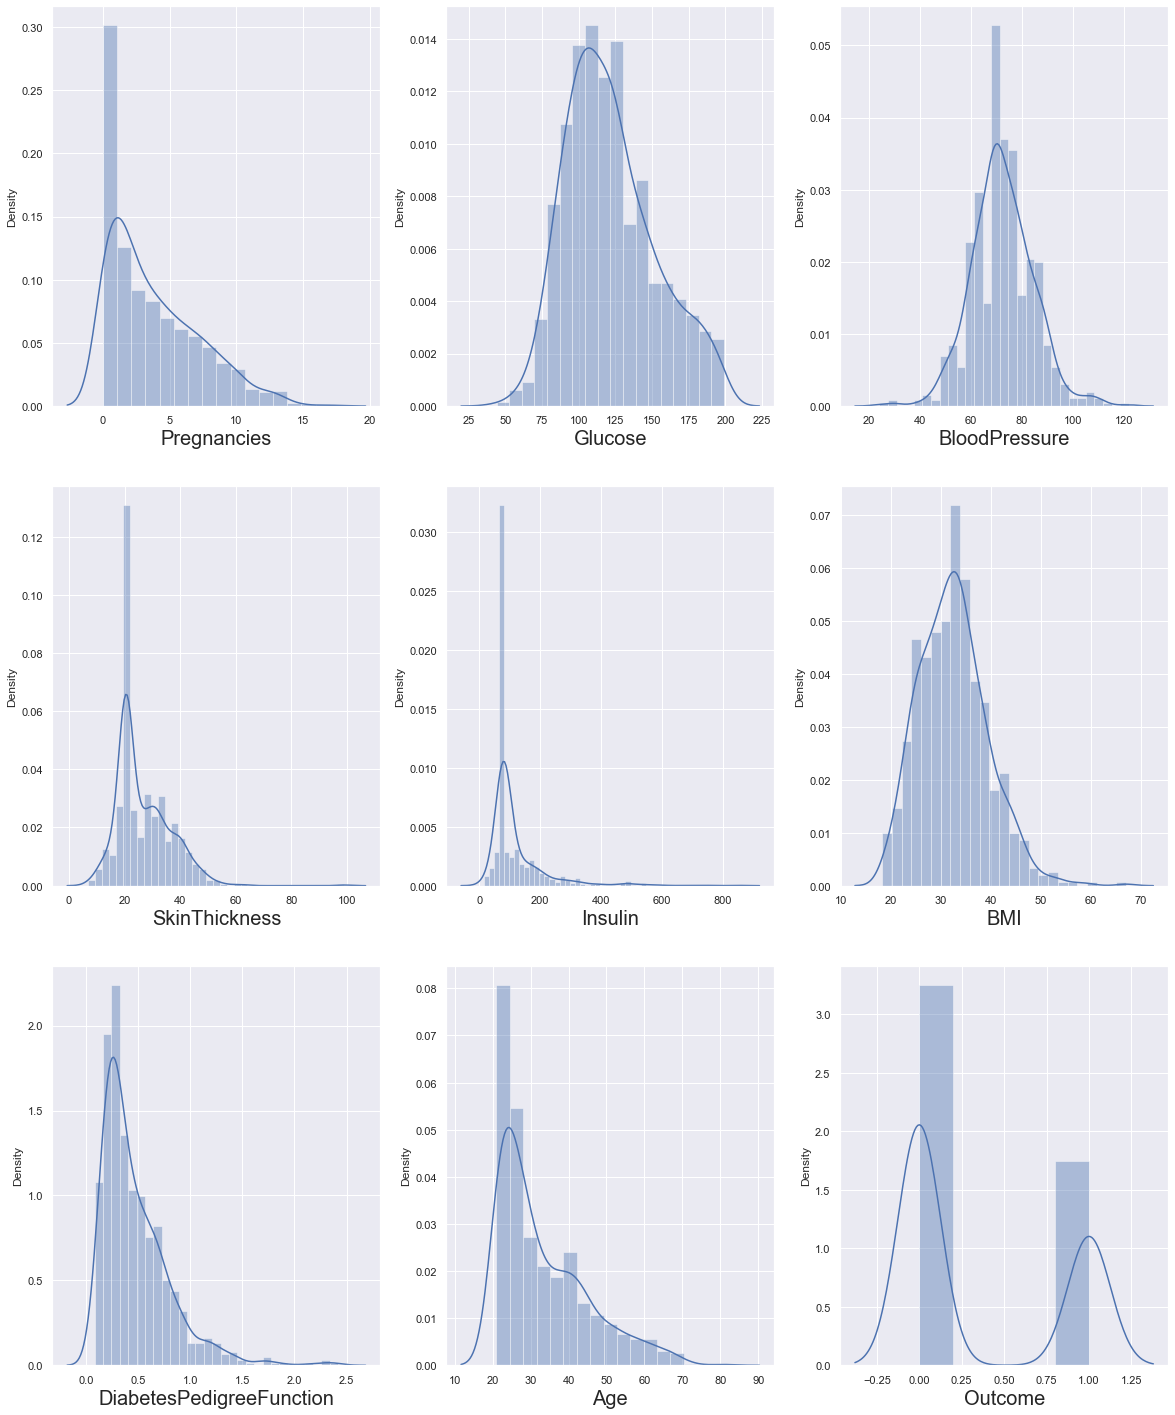

In [7]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Diabetes_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

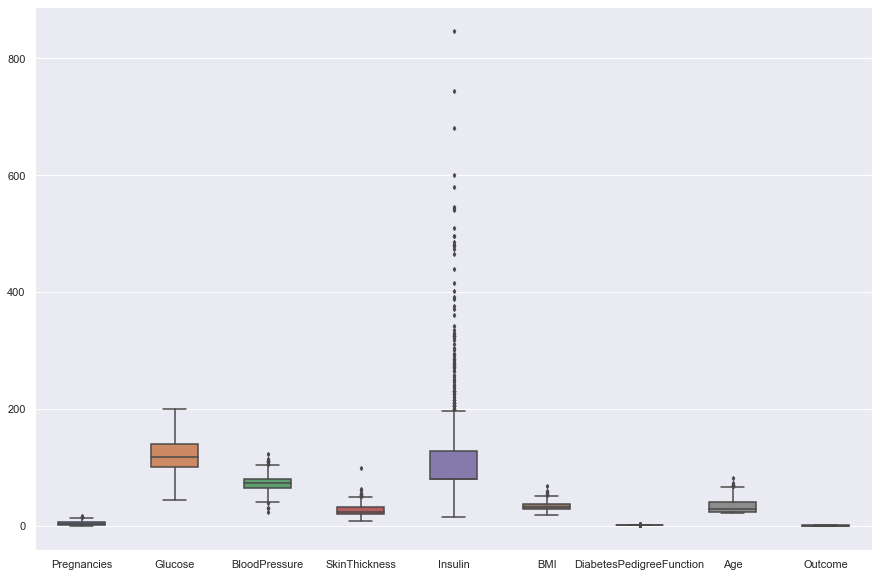

In [8]:
# Boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=Diabetes_data, width= 0.5,ax=ax,  fliersize=3)

In [9]:
q = Diabetes_data ['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
Diabetes_data_cleaned = Diabetes_data[Diabetes_data['Pregnancies']<q]
q = Diabetes_data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['BMI']<q]
q = Diabetes_data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['SkinThickness']<q]
q = Diabetes_data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['Insulin']<q]
q = Diabetes_data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['DiabetesPedigreeFunction']<q]
q = Diabetes_data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
Diabetes_data_cleaned  = Diabetes_data_cleaned[Diabetes_data_cleaned['Age']<q]

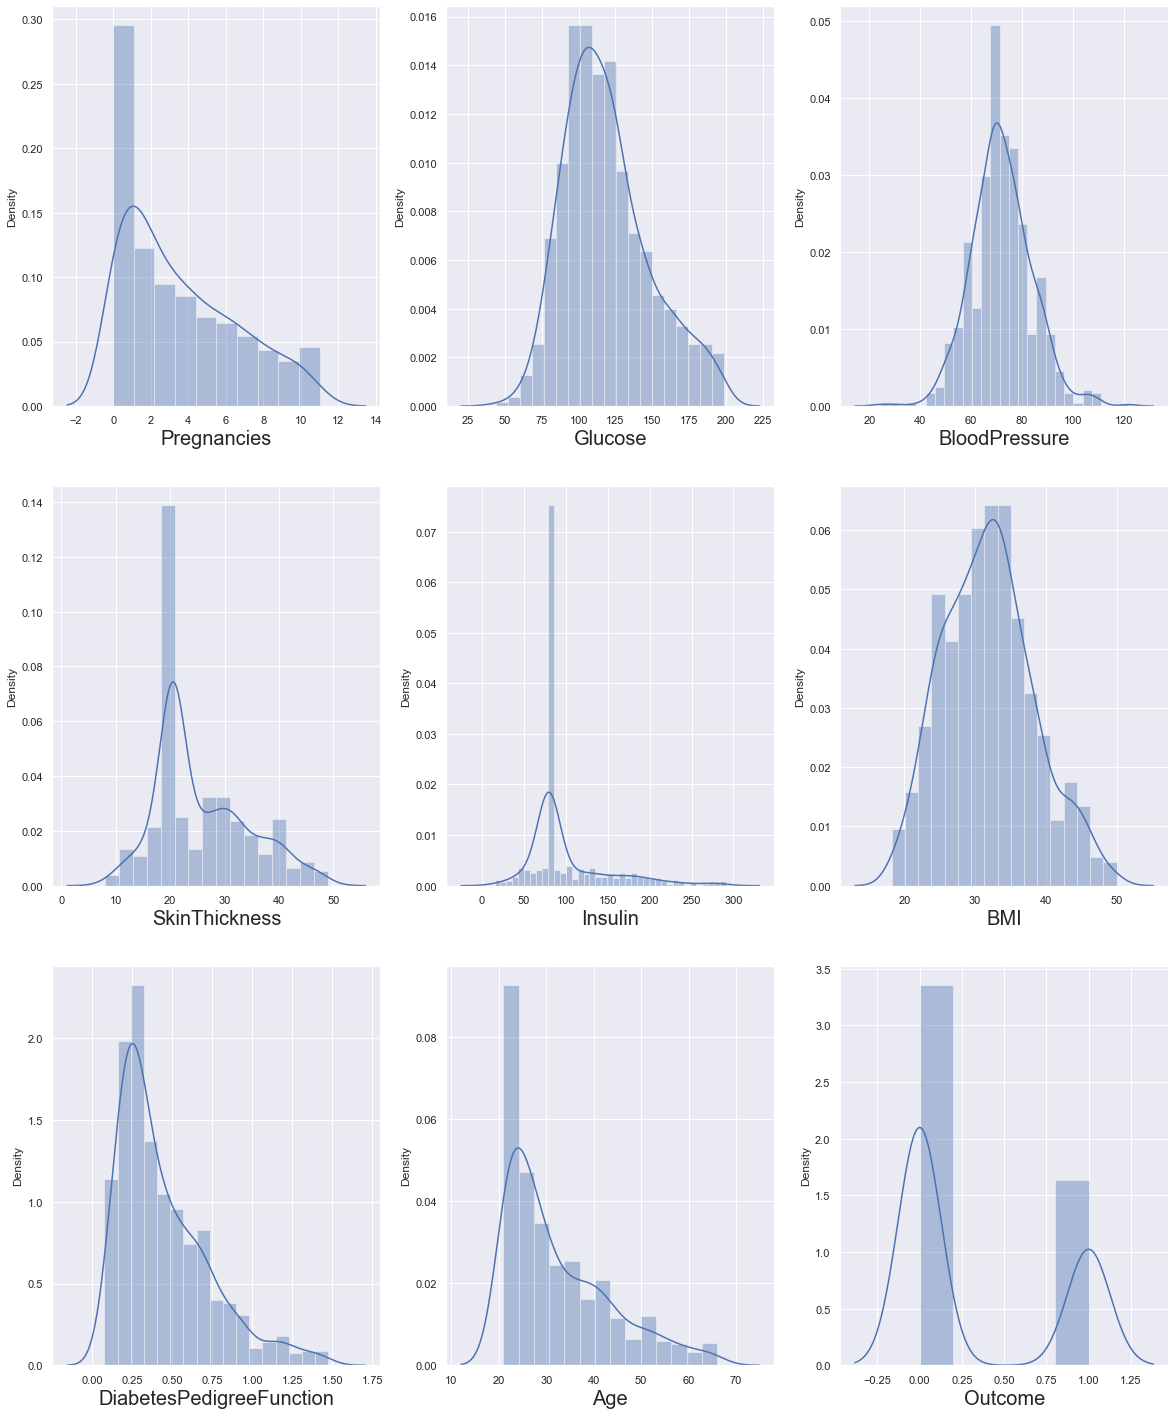

In [10]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in Diabetes_data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(Diabetes_data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
# Define our dependent and independent variable
X = Diabetes_data.drop(columns = ['Outcome'])
y = Diabetes_data['Outcome']

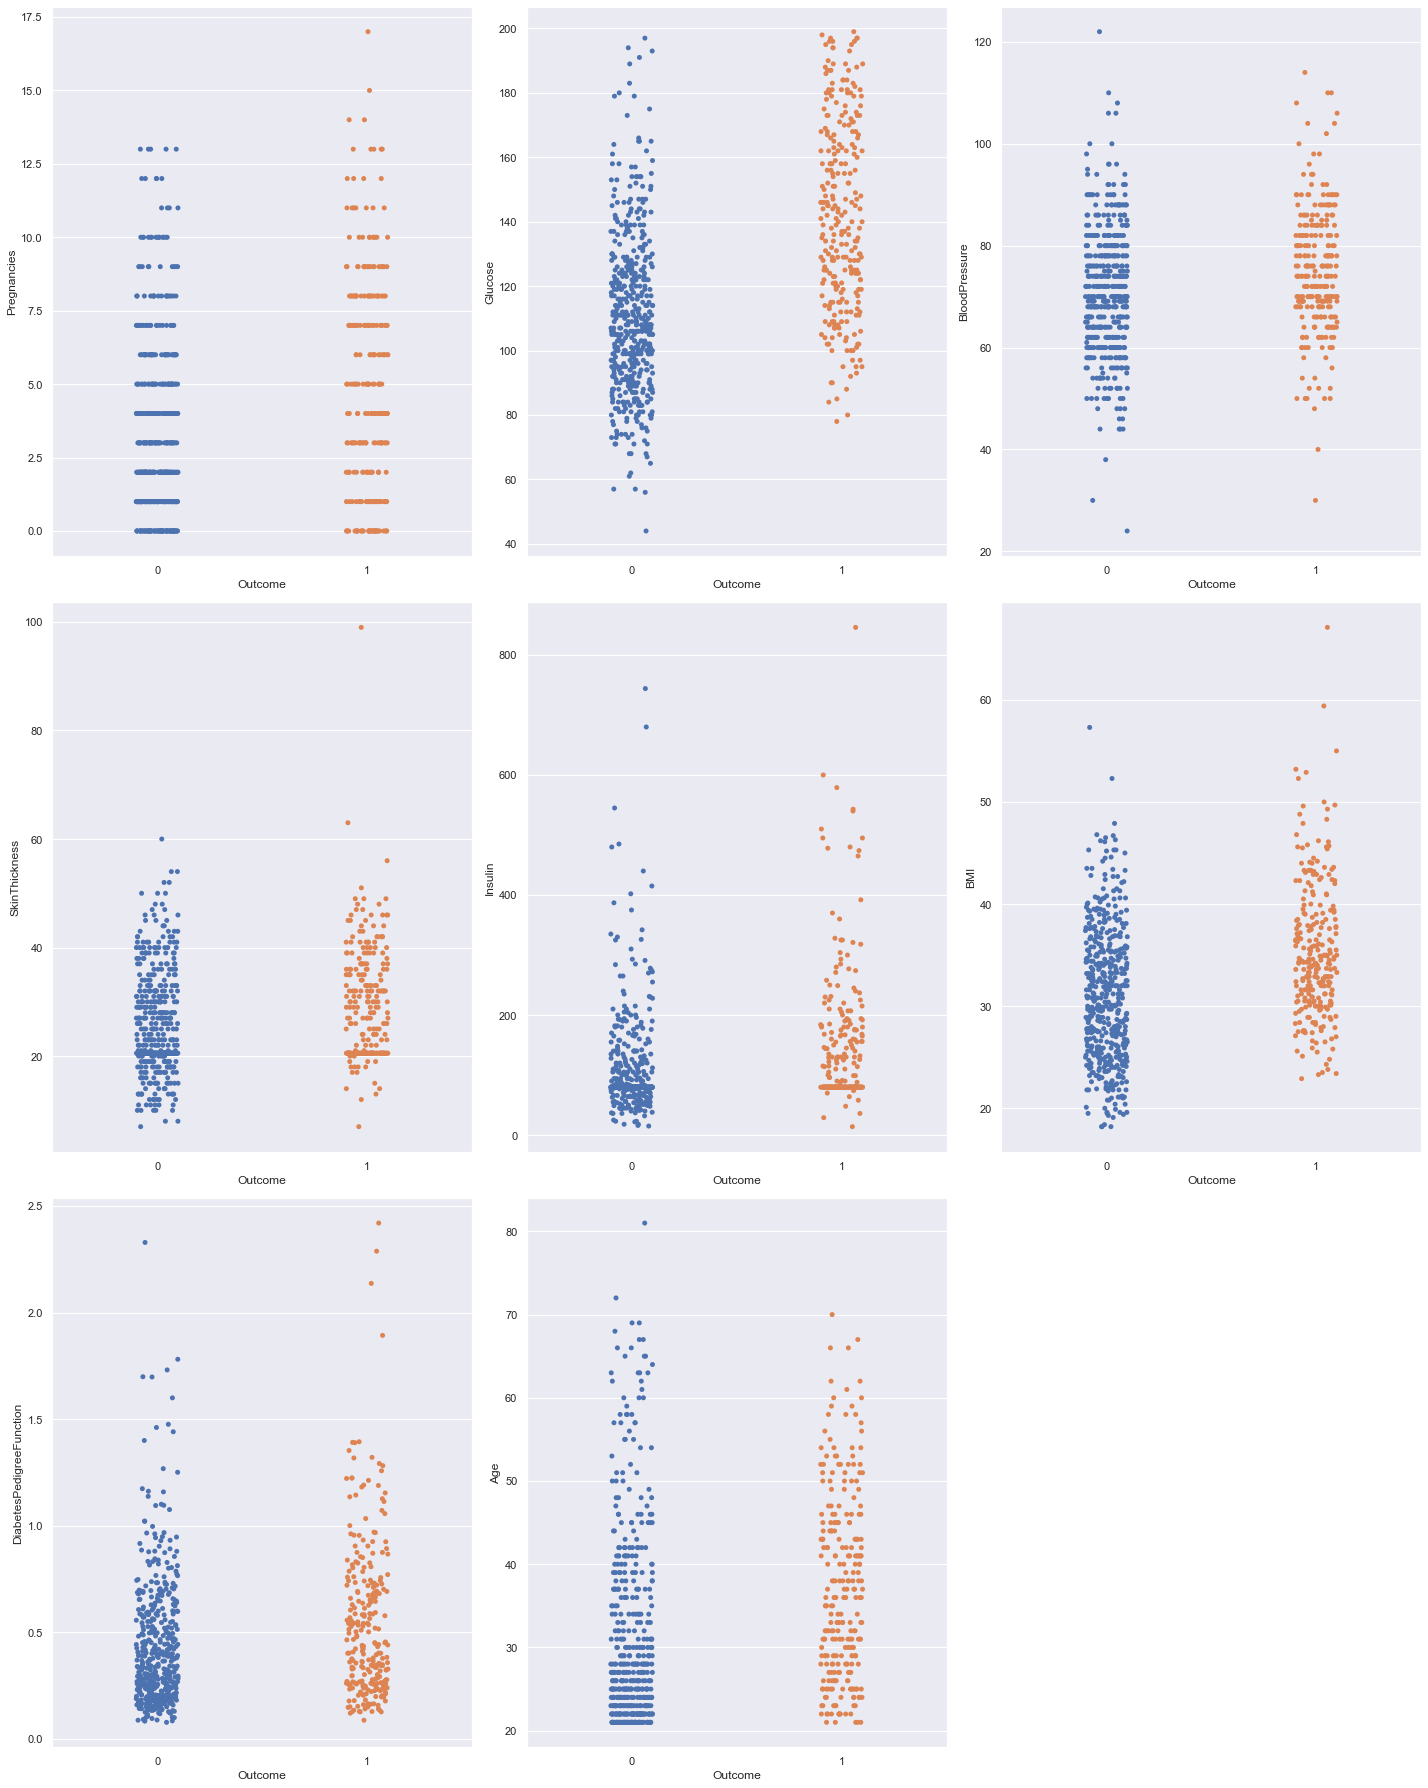

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [13]:
# scaling our data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [14]:
##let's check the values
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns


vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.


In [15]:
# spliting our dataset in train and tesing set
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25)

In [16]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(x_test)

In [18]:
# checking accurancyof model.
knn.score(x_train,y_train)

0.8333333333333334

In [19]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.75


In [20]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [21]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [22]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.672, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.783, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.690, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.716, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.722, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.783, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.809, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=11, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=12, score=0.698, 

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.774, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.750, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.713, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.748, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.730, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=9, score=0.733, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.826, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.672, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.783, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=3, score=0.713, tota

[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.809, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=11, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.698, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.739, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.809, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=12, score=0.765, 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.733, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.783, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.716, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=10, score=0.730, total=   0.0s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.713, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.690, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.670, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.774, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.698, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.809, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=12, score=0.765, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.716, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.730, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.730, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.783, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=10 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=10, score=0.739, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.716, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.722, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.783, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.672, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.690, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.670, total=   0.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=20, n_neighbors=9, score=0.748, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.716, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.730, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=10, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.716, total=   0.0s
[CV] algorithm=

[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.826, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.672, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.716, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.722, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.809, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=32, n_neighbors=13, score=0.757, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.672, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.704, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.783, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.713, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=3, score=0.739, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=5, score=0.690, total=   0.0s
[CV] algorithm=brute

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    8.0s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [23]:
# let's see the  best parameters according to gridsearch
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 11}

In [24]:
# we will use the best parameters in our k-NN algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =12)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=12)

In [26]:
knn.score(x_train,y_train)

0.7916666666666666

Looks like accuracy for training has decreased, maybe our model was overfitting the data before. 
Let's see how it perfroms on the test data.

In [27]:
knn.score(x_test,y_test)

0.7291666666666666

Let's now use k-fold cross validation and check how well our model is generalizing over our dataset:
We are randomly selecting our k to be 12 for k fold.

In [28]:
#k-fold cross validation 
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

12

In [29]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.8068181818181818 and test score is :   0.6875
for k =  2
train_score is :   0.7926136363636364 and test score is :   0.765625
for k =  3
train_score is :   0.7954545454545454 and test score is :   0.78125
for k =  4
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  5
train_score is :   0.7940340909090909 and test score is :   0.65625
for k =  6
train_score is :   0.7954545454545454 and test score is :   0.765625
for k =  7
train_score is :   0.7997159090909091 and test score is :   0.703125
for k =  8
train_score is :   0.7926136363636364 and test score is :   0.734375
for k =  9
train_score is :   0.7840909090909091 and test score is :   0.890625
for k =  10
train_score is :   0.7997159090909091 and test score is :   0.796875
for k =  11
train_score is :   0.7997159090909091 and test score is :   0.734375
for k =  12
train_score is :   0.7911931818181818 and test score is :   0.8125
*******************************************

([<matplotlib.axis.YTick at 0x20d65705190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

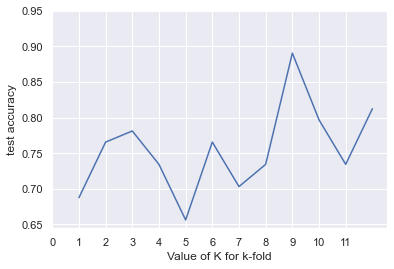

In [30]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 

Average train score is :   0.7959280303030303


Average test score is :   0.7552083333333334

Our cross validation tells that on an avergae our model has a 75% accuracy on our test data.
so, that's how we can use cross validation to compute how well our model is generalizing on our data.

We can also use cross valdition score to opt between different models or to do hyperparameter tuning.